# Case Study 2

This is a real-world case study that involves actual data. The aim is to go through the machine learning pipeline, step by step, until we have a satisfactory output. This case will involve clustering and dimensionality reduction

### Learning Activity: Loading the Python libraries

First you need to load the required Python libraries. Libraries are extensions to the base python that add functionality or help to make tasks more convenient to do. 

In [2]:
# compatibility with python2 and 3
from __future__ import print_function, division

# numerical capacity
import scipy as scipy
import numpy as np
import pandas as pd

# matplotlib setup
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

# plotly setup
import plotly.plotly as py
from plotly.graph_objs import *
from plotly.tools import FigureFactory as FF
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode()


# the tools we will use from SKLEARN

# GENERAL SKLEARN TOOLS
from sklearn import preprocessing, metrics
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

# DTS and RFS MODULE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn import linear_model
# SVM MODULE
from sklearn.svm import SVC

# the tools we will use from SKLEARN

# GENERAL SKLEARN TOOLS
from sklearn import preprocessing, metrics
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

# UNSUPERVISED LEARNING MODULE
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import spectral_clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import silhouette_score

# DTS and RFS MODULE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA

# SVM MODULE
from sklearn.svm import SVC

C:\Users\Osman\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.

C:\Users\Osman\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.



In [3]:
# Read CSV files
# Preprocessing
# Feature Extraction
# Clustering and visulisation
# Classification
# Evaluation
# Visualisation


In [6]:

# Read CSV files
df = pd.read_csv('data/household_power_consumption.txt', sep=';', parse_dates=['Date'], dayfirst=True)


In [7]:
# Show sample of the data
df.head()

Date      Time Global_active_power Global_reactive_power  Voltage  \
0 2006-12-16  17:24:00               4.216                 0.418  234.840   
1 2006-12-16  17:25:00               5.360                 0.436  233.630   
2 2006-12-16  17:26:00               5.374                 0.498  233.290   
3 2006-12-16  17:27:00               5.388                 0.502  233.740   
4 2006-12-16  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0

In [8]:
df.describe()


Sub_metering_3
count    2.049280e+06
mean     6.458447e+00
std      8.437154e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.700000e+01
max      3.100000e+01

In [9]:
df[df.columns.values[2:]] = df[df.columns.values[2:]].astype(float)

ValueError: could not convert string to float: ?

In [11]:
df2 = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [14]:
df2[df2.columns.values[2:]] = df2[df2.columns.values[2:]].astype(float)

C:\Users\Osman\Anaconda2\lib\site-packages\pandas\core\frame.py:2440: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [22]:
df2 = df2[:21993]
df2.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         21993.000000           21993.000000  21993.000000   
mean              1.901326               0.131386    241.441149   
std               1.417987               0.119905      3.915982   
min               0.194000               0.000000    228.200000   
25%               0.496000               0.000000    238.750000   
50%               1.708000               0.114000    241.690000   
75%               2.692000               0.198000    244.360000   
max               9.132000               0.800000    251.700000   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      21993.000000    21993.000000    21993.000000    21993.000000  
mean           8.030073        1.248579        2.214887        7.409221  
std            5.956005        6.653038        8.448581        8.660020  
min            0.800000        0.000000        0.000000        0.000000  
25%            2.200000        0.000000        0.000000        0.000000  
50%            7.200000        0.000000        0.000000        0.000000  
75%           11.400000        0.000000        1.000000       17.000000  
max           39.400000       77.000000       74.000000       20.000000

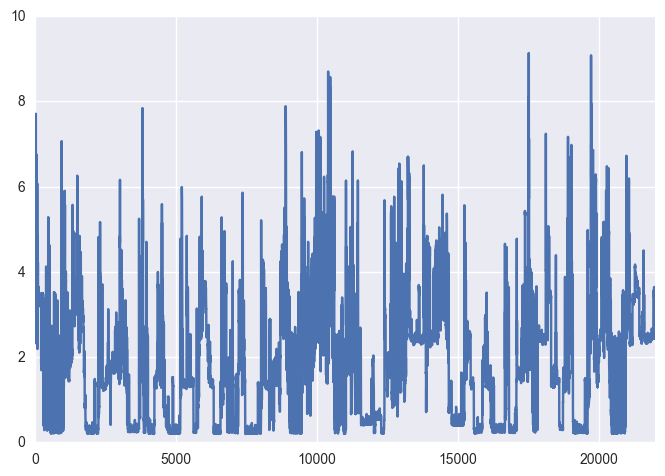

In [28]:
df2['Global_active_power'].plot()

In [18]:
# Convert to numpy array and check the dimensionality
consumption = np.array(df2)[:21993,:]

# Check the dimensionality using the .shape method of the array
print(consumption.shape)

(21993L, 9L)


In [20]:
header = df2.columns.values
# Plot boxplot
nrow, ncol = df.shape
data = [Box(
            y=consumption[:,i],
            name=header[i],
            marker=dict(color="red"),)
       for i in range(2, ncol)]
layout = Layout(
                xaxis=dict(title="Feature"),
                yaxis=dict(title="Value"),
                showlegend=False,)
fig = dict(data=data, layout=layout)
iplot(fig)

In [24]:
X = consumption

In [37]:
# Plot a 2D scatter
data = [Scatter(
        x=X[:,6],
        y=X[:,2],
        mode="markers",
        name="Berri 1 vs Maisonneuve 1",
        marker=dict(color="blue",
                    symbol="circle"))]
layout = Layout(
                xaxis=dict(title=header[5]),
                yaxis=dict(title=header[2]),
                height=600)
fig = dict(data=data, layout=layout)
iplot(fig)

In [29]:
# Plot a 2D scatter
data = [Scatter(
        x=X[:,1],
        y=X[:,2],
        mode="markers",
        name="Berri 1 vs Maisonneuve 1",
        marker=dict(color="blue",
                    symbol="circle"))]
layout = Layout(
                xaxis=dict(title=header[5]),
                yaxis=dict(title=header[2]),
                height=600)
fig = dict(data=data, layout=layout)
iplot(fig)

In [30]:
# Plot a 2D scatter
data = [Scatter(
        x=X[:,0],
        y=X[:,2],
        mode="markers",
        name="Berri 1 vs Maisonneuve 1",
        marker=dict(color="blue",
                    symbol="circle"))]
layout = Layout(
                xaxis=dict(title=header[5]),
                yaxis=dict(title=header[2]),
                height=600)
fig = dict(data=data, layout=layout)
iplot(fig)

In [39]:
# Plot a 2D scatter
data = [Scatter(
        x=X[:,0],
        y=X[:,8],
        mode="markers",
        name="Berri 1 vs Maisonneuve 1",
        marker=dict(color="blue",
                    symbol="circle"))]
layout = Layout(
                xaxis=dict(title=header[0]),
                yaxis=dict(title=header[8]),
                height=600)
fig = dict(data=data, layout=layout)
iplot(fig)

In [40]:
# Plot a 2D scatter
data = [Scatter(
        x=X[:,1],
        y=X[:,8],
        mode="markers",
        name="Berri 1 vs Maisonneuve 1",
        marker=dict(color="blue",
                    symbol="circle"))]
layout = Layout(
                xaxis=dict(title=header[1]),
                yaxis=dict(title=header[8]),
                height=600)
fig = dict(data=data, layout=layout)
iplot(fig)

In [41]:
X[0,:]

array([Timestamp('2006-12-16 00:00:00'), '17:24:00', 4.216, 0.418, 234.84,
       18.4, 0.0, 1.0, 17.0], dtype=object)

In [50]:
from datetime import datetime
dt = datetime.utcnow()
dt64 = np.datetime64(X[0,0])
ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')

datetime.utcfromtimestamp(ts)
times = [datetime.utcfromtimestamp((np.datetime64(X[i,0]) - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')).strftime("%A")
         for i in range(X.shape[0])]

times = np.array([times])
X_o = np.concatenate((X, times.T), axis=1)

C:\Users\Osman\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning:

parsing timezone aware datetimes is deprecated; this will raise an error in the future

C:\Users\Osman\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning:

parsing timezone aware datetimes is deprecated; this will raise an error in the future



In [76]:
times = X[:,1]

In [77]:
times2 = preprocessing.LabelEncoder().fit_transform(times)

In [85]:
times3 = preprocessing.OneHotEncoder().fit_transform(times2.reshape(-1, 1)).toarray()

In [86]:
times3.shape

(21993L, 1440L)

In [87]:
X_2 = np.concatenate((X[:,2:], times3), axis=1)

In [88]:
pca = PCA(2)
X_reduced = pca.fit_transform(X_2)

In [89]:
# Plot a 2D scatter
data = [Scatter(
        x=X_reduced[:,0],
        y=X_reduced[:,1],
        mode="markers",
        name="Berri 1 vs Maisonneuve 1",
        marker=dict(color="blue",
                    symbol="circle"))]
layout = Layout(
                xaxis=dict(title="axis1"),
                yaxis=dict(title="axis2"),
                height=600)
fig = dict(data=data, layout=layout)
iplot(fig)

In [93]:
Xsub = X[:,2:]
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(Xsub)
cluster_assignment = kmeans.predict(Xsub)
metrics.silhouette_score(Xsub, cluster_assignment, metric='sqeuclidean')

0.60033125957203226

In [97]:
pca2 = PCA(1)
y = pca2.fit_transform(X[:,2:])

In [105]:

# Plot a 2D scatter
data = [Scatter(
        x=X[:,1],
        y=y[:,0],
        mode="markers",
        name="Berri 1 vs Maisonneuve 1",
        marker=dict(color="blue",
                    symbol="circle"))]
layout = Layout(
                xaxis=dict(title=header[0]),
                yaxis=dict(title="reduced_dimension"),
                height=600)
fig = dict(data=data, layout=layout)
iplot(fig)

In [100]:
X.shape

(21993L, 9L)

In [103]:
y[:10]

array([[ 12.60439124],
       [ 14.60886687],
       [ 15.79816998],
       [ 15.25582813],
       [ 11.06445783],
       [ 11.25455834],
       [ 11.21640189],
       [ 11.18360703],
       [ 11.48796904],
       [ 11.27996589]])

In [107]:
# Plot a 3D scatter
regions = ['cluster1', 'cluster2']
colors = ['red', 'blue', 'green']
data = [Scatter3d(
        x=X[cluster_assignment==i,0],
        y=X[cluster_assignment==i,1],
        z=y[cluster_assignment==i,0],
        mode="markers",
        name=regions[i],
        marker=dict(color=colors[i],
                    symbol="circle")) for i in range(2)]
layout = Layout(
                scene=Scene(
                xaxis=dict(title=header[0]),
                yaxis=dict(title=header[1]),
                zaxis=dict(title="reduced dimension")),
                height=600)
fig = dict(data=data, layout=layout)
iplot(fig)